In [ ]:
%%html
<style>
table {display: inline-block}
td {text-align:left}
.consoleMachineFont {color:blue;font-family:Courier}
.consoleUserFont {font-family:Courier}
</style>

# קריאה וכתיבה מקבצים

### אג'נדה
- מבוא לקבצים
- פתיחה וסגירה של קבצים
- קריאה מקבצים
- כתיבה לקבצים

<span style="color: red;">TODO: סרטון מבוא לקבצים ותקיות.</span>

בחלק זה נלמד כיצד לעבוד עם קבצים בתוכניות פייתון, כלומר איך לקרוא מידע קיים ולכתוב מידע חדש אל מחוץ לקוד שלנו. שימוש בקבצים מאפשר לנו לשמור מידע בצורה **קבועה**, שאינה נעלמת עם סיום הריצה של התוכנית, להחזיק כמויות גדולות של נתונים, ולשתף מידע בין תוכניות שונות או בין מחשבים שונים.

נלמד כיצד לפתוח קובץ, לקרוא את תוכנו, לעדכן או להוסיף מידע ולשמור אותו מחדש. בסיום החלק הזה תוכלו לכתוב תוכניות ששומרות מידע טקסטאולי בקבצים במחשב שלכם. 



## מהו קובץ?

קובץ במחשב הוא משאב לאחסון מידע - אפשר לחשוב עליו כ"מסמך" דיגיטלי.
קבצים יכולים להכיל מידע מסוגים שונים - יש קבצי תמונה, מוזיקה, וידאו, טקסט, טבלאות ועוד.

### סיומות

לכל קובץ יש סיומת (extension), אשר מסמלת איזה סוג תוכן מאוחסן בקובץ. כך המחשב יודע מה רצף הביטים אמור לייצג - אם הסיומת אומרת שמדובר בשמע, הוא ימיר את הביטים לצלילים ברמקול. אם מדובר בטקסט, הוא ימיר את הביטים לתווים לפי טבלת ascii כפי שלמדנו.

סיומת תופיע לאחר שם הקובץ, היא מסומנת ב-`.` ואחריה מספר אותיות. לדוגמא:
- `txt.` מסמל שמדובר בקובץ טקסט.
- `mp3.` מסמל שמדובר בקובץ מוזיקה.
- `jpg.` מסמל שמדובר בקובץ של תמונה.
- `py.` מסמל שמדובר בקובץ פייתון!

בשלב הזה אנחנו נתמקד בקבצי טקסט.

## מערכת קבצים

### למערכת קבצים מבנה היררכי

מערכת הקבצים של המחשב בנויה בצורה היררכית, כלומר כמו עץ: בראש ההיררכיה נמצא השורש (root) המשותף לכל העץ. במערכות הפעולה מסוג Windows ה-root הוא בד"כ נתיב לתחילת לכונן  (C:\)  
בתוך ה-root יש תיקיות שיכולות להכיל קבצים ותיקיות נוספות, וכל אחת מהתיקיות הללו יכולה להכיל תיקיות נוספות בעצמה. כך נוצרת מבנה מסודר שמאפשר לנו לארגן את המידע בצורה ברורה ולגשת אליו לפי מיקום (path) בתוך העץ הזה.

להלן דוגמא של עץ היררכיית קבצים ותקיות במערכת הפעלה מסוג  Windows:

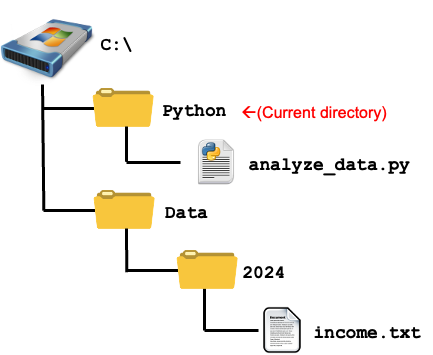

במקרה הזה - הקובץ analyze_data נמצא בתיקיית Python, אשר נמצאת בשורש - `\:C`.

מיקום של קובץ נקרא **ניתוב**. בדרך כלל נסמן את הירידה בעץ התיקיות באמצעות `/`.

### ניתוב יחסי (relative) ומלא (absolute) 

על מנת לפתוח קובץ מהקוד שלנו, עלינו לייצג במחרוזת את הניתוב המתאים לקובץ אליו אנו רוצים לגשת.

ניתן לעשות זאת באחת משתי דרכי הניתוב הבאות:

**ניתוב אבסולוטי/מלא (Absolute path)** - לתאר את הניתוב של הקובץ מה`root` עד הקובץ הרצוי.   
כדי לגשת לקובץ `analyze_data.py` בצורה הזו, נתחיל מהשורש ונרד למטה בעץ התיקיות:  
כלומר נתחיל בשורש -> ניכנס לתיקייה `Python` -> ואז נגיע לקובץ `analyze_data.py`.

**ניתוב רלטיבי/יחסי (Relative path)** - לתאר את הניתוב **מהמיקום הנוכחי** לקובץ הרצוי. 
אבל מהו המיקוד הנוכחי שלנו? נשים לב כי **גם הקוד שלנו נמצא בקובץ שיש לו ניתוב משלו, וזהו למעשה המיקום הנוכחי שלנו** 
כיצד נגיע מהמיקום הנוכחי לקובץ אליו אנו רוצים לגשת? בדוגמא לעיל, על מנת לגשת לקובץ income ממיקום הקוד, נמצא בתיקיית Python, **"נעלה" תיקייה אחת למעלה**, ניכנס לתיקייה Data, ניכנס לתיקייה 2024 ורק אז ניגש לקובץ income.

אבל כיצד "נעלה" תיקיה אחת למעלה?

### הסימונים `.` ו`..`

יש שני סימונים מיוחדים כדי לייצג ניתובים יחסיים.

`.` - זו הדרך לסמן "התיקייה שבה אנחנו נמצאים". לדוגמה, אם הקוד שלנו היה נמצא בתיקיית Data, הניתוב היחסי של הקובץ income יהיה "`income.txt/2024/.`".

`..` - זו הדרך "לעלות תיקייה אחת למעלה". לדוגמה, אם היינו רוצים להגיע ל `income.txt` מהמיקום של `analyze_data.py`, הניתוב היחסי יהיה "`Data/2024/income.txt/..`".

בנוסף - אם הקובץ נמצא בדיוק בתיקיה שבה הקוד, ניתן להמיר את "`file_name.txt/.`" ב"`filename.txt`". כלומר לוותר על ה`.`.

```{admonition} **שימו לב**
:class: error

זכרו כי הקו אלכסוני הפוך (`\`) נועד כדי לייצג תווים מיוחדים (כמו `\n`).  
לכן, יש להמנע משימוש בתו כזה במחרוזות שייצגו נתיבי קבצים. שימוש כזה יגרום ליצירת נתיב קובץ לא צפוי. לדוגמא:

```

In [26]:
print("C:\Users\Desktop\file.txt")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3241493538.py, line 1)

במקרה הזה פייתון מנסה לחפש את התו המיוחד `U\` (כחלק מ`Users\`), ולא מוצא. לכן הוא זורק שגיאה.

כאלטרנטיבה, ניתן לייצג קו אלכסוני הפוך בנתיבי הקבצים בצורות הבאות:
- `'C:/Users/Desktop/file.txt'` - שימוש בקו אלכסוני רגיל.
- `'C:\\Users\\Desktop\\file.txt'` - החלפת כל קו אלכסוני הפוך בשני קווים.


In [28]:
print('C:\\Users\\Desktop\\file.txt')
print('C:/Users/Desktop/file.txt')

C:\Users\Desktop\file.txt
C:/Users/Desktop/file.txt


### תרגול
בשאלות הבאות נתמקד בעץ התיקיות הבא:

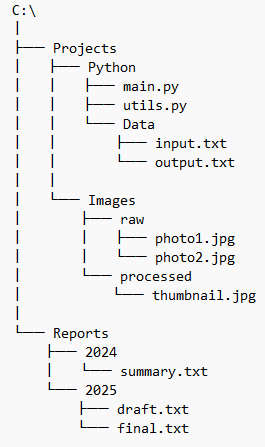

In [22]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה הניתוב האבסולוטי של הקובץ output?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "C:/Projects/Python/Data/output.txt",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "C:/Projects/Python/Data",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "output.txt",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "C:/Projects/Python/Data/output",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

In [23]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה הניתוב היחסי של הקובץ output כשמסתכלים מהקובץ input?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "C:/Projects/Python/Data/output.txt",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "C:/Projects/Python/Data",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "output.txt",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "C:/Projects/Python/Data/output",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

In [30]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "איך ניתן לגשת לקובץ summary מהקובץ main?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "by: C:/Reports/2024/summary.txt",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "by: ../Reports/2024/summary.txt",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "by: ../../Reports/2024/summary.txt",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "by: ././Reports/2024/summary.txt",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "by: ./Reports/2024/summary.txt",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## קבצי טקסט

קבצי טקסט מורכבים מ**שורות**.  כל שורה היא מחרוזת, כלומר **רצף תווים**.  
התו האחרון בכל שורה הוא התו המיוחד (escape character) ירידת שורה (`n\`).

**תזכורת:** רצף תווים (בד"כ 2) המתחילים בקו אלכסוני הפוך -`\` - נקראים גם **escape characters**, והם נועדו לסמן תווים שלא ניתן להקיש במקלדת באופן פשוט.   
בד"כ לא נראה תווים הללו זה בעורכי טקסט סטנדרטיים, אלא את התווים שהם אמורים לייצג.

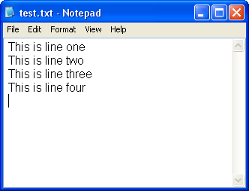

מאחורי הקלעים יהיה כתוב:  
`This is line one\nThis is line two\nThis is linethree\nThis is line four\n`

## פתיחת וסגירת קבצים

### גישה לקובץ

כדי לגשת קובץ בפייתון, משתמשים בפקודה `open`, שמקבלת שני פרמטרים:  
`filename` - מחרוזת המייצגת את הניתוב של הקובץ שמעוניינים לפתוח.  
`mode` - פתיחת קובץ כוללת אילו פעולות ניתן לבצע עליו.  

`open` מחזירה אובייקט מסוג המשמש כ**חיבור לקובץ** שנקרא גם **handle**. ניתן לחשוב על ה-handle כ"צינור" שאפשר דרכו להעביר נתונים אל הקובץ וממנו. כלומר, **`f` אינו הקובץ עצמו, אלא משמש לתקשורת עם הקובץ**.  


```{admonition} **שימו לב**
:class: error

זכרו להמנע משימוש בקו אלכסוני הפוך (`\`) גם בשם הקובץ

```

#### מצבי פתיחת קובץ

- `'r'` - קריאה בלבד.
- `'w'` - כתיבה בלבד (ימחק את הנתונים הקודמים)
- `'a'` - הוספה לקובץ (כתיבה לסוף הקובץ הקיים)

**דוגמא לשימוש:** 
``` python
f = open("my_file.txt", "r")
```

In [9]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "בדוגמא לעיל, האם יהיה ניתן לכתוב לתוך הקובץ my_file?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "כן",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "לא",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "רק להוסיף",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

#### מה יקרה אם נפנה לקובץ שאינו קיים?

 במצב קריאה (`r`), כמובן לא נוכל לקובץ, ולכן נקבל שגיאה

In [10]:
f = open("not_existing_file.txt", "r")

לעומת זאת,  במצבי כתיבה (`w`) או הוספה (`a`), אם הקובץ אינו קיים, **יווצר קובץ חדש כל עוד הניתוב לספריה המכילה את הקובץ קיים** 

לדוגמא, הקובץ הבא יצליח להפתח במצב כתיבה, אפילו שאינו קיים, מכיוון שאנו מחפשים אותו בתיקיה הנוכחית עליה אנו עובדים:

In [11]:
f = open("not_existing_file.txt", "w")

מאידך, בניתוב של ספירה שאינו קיימת, קריאה כזו תכשל

In [12]:
f = open("not_existing_folder/not_existing_file.txt", "w")

FileNotFoundError: [Errno 2] No such file or directory: 'not_existing_folder/not_existing_file.txt'

### סגירת קובץ

סגירה של קובץ מתבצעת על-ידי מתודה של אובייקט ה`file` שפתחנו. לדוגמה, אם שמרנו את האובייקט בשם f, נסגור את הקובץ על-ידי:
``` python
f.close()
```

**חשוב מאוד לסגור כל קובץ שפתחנו משתי סיבות**:

1. **שחרור משאבים** - כל handle הנוצר עבור קובץ פתוח תופס משאבים במערכת ההפעלה. נחזור לדוגמא בה חשבנו על handle כמו "צינור" שמאפשר להוציא ולהכניס נתונים לקבצים שלנו. מכיוון שמספר ה"צינורות" הללו מוגבל, יש לשחררם ברגע שסיימנו להשתמש בקובץ, ושחרור צינור נעשה באמצעות פקודת `close`. אם לא נסגור קבצים, אנחנו עלולים לגרום לכך שהתוכנית או אפילו המחשב לא יוכלו לפתוח קבצים נוספים.

2. **שמירת מידע** - אם אנחנו כותבים לקובץ, השינוי לא תמיד יתעדכן מידית. לפעמים המערכת מחכה שנבקש לכתוב מספיק תווים לפני שהיא מעדכנת את הקובץ. אם הקובץ לא נסגר, המידע עלול להישאר בזיכרון ולא להישמר בפועל, וכך נאבד נתונים.

### `with` context manager

כדי לא לקחת את הסיכון שנפתח קובץ ולא נסגור, ניתן להשתמש ב-`with` כדי להגדיר את הבלוק של הקוד, או את **הקונטקסט** בו קובץ יהיה זמין.  
הקובץ יפתח בתחילת הבלוק, **ויסגר אוטומטית** בסופו.

אם עד כה כתבנו כך:

In [ ]:
# replace this code:
f = open('test_file_multi_line.txt', 'r')
content = f.read()
f.close()

כעת, ניתן גם לכתוב כך.

In [ ]:
# with this:
with open('test_file_multi_line.txt', 'r') as f:
    content = f.read()
    
# close is automatically called afterwards

בשורה הראשונה הקובץ נפתח, והאובייקט שמייצג אותו נשמר בשם `f`.  
ברגע שהקוד יוצא מהבלוק של ה־`with` (כלומר נגמרת ההזחה), פייתון **סוגר את הקובץ אוטומטית**. פייתון יסגור את הקובץ אפילו אם בלוק הקוד לא סיים לרוץ בגלל שגיאה. 

כך אנחנו לא צריכים לזכור לקרוא ל־`close`, ולא לוקחים סיכון שהקובץ יישאר פתוח.

הדוגמאות שנראה ישתמשו בשתי הדרכים, כדי להרגיל אתכם לשתי צורות הכתיבה.

### תרגול
להלן ארבעה קטעי קוד:

```python
# Code 1                       | # Code 2                   | # Code 3                    | # Code 4
f = open("file.txt", "r")      | f = open("file.txt", "r")  | with open("file.txt", "r"): | with open("file.txt", "r"):
print("hello")                 | print("hello")             |     while True:             |     print("hello" + 2)
f.close()                      |                            |         print("hello")      |
```

In [16]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "באילו מקטעי הקוד הקובץ ייסגר?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "1",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "2",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "3",
            "correct": false,
            "feedback": "לא נכון"
        }
        ,
        {
            "answer": "4",
            "correct": true,
            "feedback": "נכון!"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz, shuffle_answers=False)


<IPython.core.display.Javascript object>

## קריאה מקובץ

לאחר שפתחנו את הקובץ (במצב קריאה) - ניתן להשתשמש ב-handle שלנו (בדוגמאות למעלה `f`) כדי לקרוא את התוכן השמור בקובץ. כעת נראה ארבע דרכים נפוצות לקריאה מתוך קובץ.

### `()f.read`

מתודה זו קוראת את כל תוכן הקובץ בבת אחת ומחזירה אותו כמחרוזת אחת ארוכה.

In [29]:
f = open('test_file_multi_line.txt', 'r')
lines = f.read()
f.close()

print(lines)

This is line1
This is line 2
The end


בהדפסה ראינו ירידת שורה מאחר שכך פייתון מדפיס את התו `n\`. עם זאת, הטקסט השמור ב`lines` הינו `'This is line1\nThis is line 2\nThe end'`.

### `()f.readline`

מתודה זו קוראת את השורה הבאה בלבד מתוך הקובץ, יחסית למיקום הנוכחי שבו אנחנו נמצאים.  
שימושי כשאנחנו רוצים לעבור שורה-שורה באופן ידני.

In [6]:
f = open('test_file_multi_line.txt', 'r')
line1 = f.readline()
line2 = f.readline()
f.close()

print(line1)
print(line2)

This is line1

This is line 2



```{admonition} **עצרו וחשבו:** מדוע קיים רווח בין שתי השורות שהודפסו?
:class: dropdown, caution
רווח זה נובע מתו ירידת השורה `n\` שקיים בסוף כל שורה, מלבד השורה האחרונה בקובץ
```

```{admonition} **שימו לב**
:class: error
כל פעולת קריאה מקדמת אותנו שורה בקובץ, כלומר, קריאה של שורה אחת תקדם את הסמן לשורה הבאה.  
כדי לחזור לתחילת הקובץ, נצטרך לסגור ולפתוח אותו מחדש.
```

### `()f.readlines`

 מתודה זו קוראת את **כל השורות שנשארו בקובץ** ומחזירה אותן כ**רשימה של מחרוזות** (כל איבר ברשימה הוא שורה אחת).
מדובר בפקודה נוחה ביותר אם רוצים רשימה שאפשר לעבור עליה או לעבד אותה.

In [7]:
f = open('test_file_multi_line.txt', 'r')
lines = f.readlines()
f.close()

print(lines)
print(lines[2])

['This is line1\n', 'This is line 2\n', 'The end']
The end


```{admonition} **שימו לב**
:class: error

גם כאן, כל שורה, מלבד האחרונה, מכילה בסופה את התו `n\`.
```

### לולאת `for` על הקובץ

ניתן לעבור שורה-שורה באמצעות לולאת `for`. הדרך הזו מתאימה במיוחד לקבצים גדולים, מאחר שהיא לא שומרת בזכרון את כל הקובץ בבת אחת.

In [8]:
f = open('test_file_multi_line.txt', 'r')
for line in f:
    print(line, end='')
f.close()

This is line1
This is line 2
The end

###  פונקציות שימושיות לעריכת מחרוזות בקבצים

כמו שראינו, כאשר אנחנו עובדים עם קבצים, אנחנו מקבלים טקסט גולמי.
הטקסט הזה לא תמיד מוכן לשימוש ישיר: לעיתים הוא כולל פסיקים, רווחים מיותרים, ירידות שורה או סימנים נוספים.
לכן חשוב להכיר כמה פונקציות בסיסיות שמאפשרות לנו לנקות, לפרק ולעבד מחרוזות, כדי שנוכל להפוך את המידע מהקובץ לנתונים שימושיים.

#### `()split` - פירוק לתתי מחרוזות לפי תו מפריד

קבצים לעיתים מכילים טקסטים ארוכים, אפילו בשורה בודדתת. באמצעות `()split` ניתן יהיה לפרק טקסט ארוך לפי תו מפריד. מתודה זו "תחתוך" את המחרוזת ממנה הופעלה המתודה בכל המקומות בהם יופיעו תווים מפרידים, ותחזיר רשימה המכילה כל תתי-המחרוזות שנוצרו בעקבות החיתוך. ברירת המחדל המחרוזת תפורק בכל תו רווח שהוא (`" ", \n, \t` וכו').

לדוגמא, במקרה הזה נפצל את המחרוזת לפי פסיקים.

In [11]:
s = "topeka, kansas city,wichita,,olathe"

cities = s.split(',') 
# If a delimiter is not specified, the string is split to words separated by a sequence of whitespaces.

print(cities)

['topeka', ' kansas city', 'wichita', '', 'olathe']


ניתן לראות כי קיבלנו מחרוזת אחת ריקה, וזאת מאחר שיש שני פסיקים ביניהם "אין כלום" - כלומר יש ביניהם מחרוזת ריקה.

#### פונקציות `strip` 

ניתן לנקות תווים "מיותרים" **מתחילת ומסוף המחרוזת** על ידי הפונקציות `strip`, `rstrip`, `lstrip`.    
אם לא נגדיר מראש, תווים מיותרים מוגדרים להיות כל תו רווח שהוא, אך ניתן להכניס כפרמטר אילו תווים נחשבים מיותרים.

`()strip` – מסיר תווים מיותרים משני הצדדים

In [18]:
'  \t\n spacious \t  '.strip()

'spacious'

In [19]:
'www.example.com'.strip('comwz.')

'example'

```{admonition} **שימו לב!**
:class: error

אף אחת מהמתודות האלו לא תוריד תווים מאמצע המחרוזת. ולכן ה"m" של example נשארה במקומה.    
```


`()rstrip` – מסיר רק מהצד הימני (כלומר מסוף המחרוזת)

In [20]:
lines = ['this is line 1\n', 'this is line 2\n', 'the end']
for i in range(len(lines)):
    lines[i] = lines[i].rstrip()
print(lines)

['this is line 1', 'this is line 2', 'the end']


נסו בעצמכם - מה עושה הפונקציה `()lstrip`?

In [31]:
# Write your code here

### תרגיל: הדפסת שכיחות מילים

הדפיסו את המילים מהקובץ `input.txt` לפי שכיחות יורדת. כלומר קודם את המילה הכי נפוצה בקובץ, לאחר מכן המילה השנייה הכי נפוצה, וכן הלאה.

כדי לבדוק את הקוד שלנו, יצרנו עבורכם קובץ בשם `input.txt`.   
עליכם לפתוח אותו, לקרוא את תוכנו, ולבצע את החישוב. 

```{admonition} **שימו לב**
:class: error

אל תשכחו לסגור את הקובץ באמצעות מתודה `close`
```

In [ ]:
with open("input.txt", "w") as input_file:
    line = ["a"] * 20 + ["and"] * 10 + ["where"] * 5
    input_file.write(" ".join(line))

```{admonition} **המלצה**
:class: tip

נסו קודם להדפיס את תוכן הקובץ במלואו, כדי להבין כמה שורות יש בקובץ.

```


In [ ]:
# Write your code here

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

``` python
f = open("input.txt", "r")
d = {}
for line in f:
    for word in line.split():
        d[word] = d.get(word, 0) + 1
f.close()

for w in sorted(d, key=d.get):
     print(w + ":", d[w])

```

## כתיבה לקובץ

עד עכשיו למדנו רק כיצד ניתן לקרוא מקבצים. עכשיו נלמד לכתוב לקבצים בעצמנו.  
ראשית, נצטרך לפתוח את הקובץ בהרשאות כתיבה מתאימות (write/append). 
לאחר שהקובץ פתוח, ניתן להשתמש בפקודה `f.write(string)` כדי לכתוב לתוך הקובץ מחרוזת. חשוב לשים לב שהפקודה `write` כותבת בדיוק את התוכן שנעביר לה, כולל רווחים ותווי ירידת שורה אם הוספנו כאלו.

בואו נראה דוגמה. במקרה הזה נפתח את הקובץ `test_file_3.txt` עם הרשאות כתיבה.  
לאחר מכן נבצע שלוש פקודות `write`, שייכתבו לקובץ אחת אחרי השנייה.
בראשונה כתבנו לקובץ את המחרוזת `"This is a test"`. אחריה כתבנו את תו ירידת השורה `n\`. לבסוף, כדי לכתוב את הטאפל לתוך הקובץ, המרנו אותו למחרוזת וכתבנו גם אותו.

In [16]:
# open a file (or create it if no such file exists)
f = open('test_file_3.txt', 'w')
f.write("This is a test")
# newline
f.write('\n')

# to write a non-string object, first convert to string
tpl = ('string', 40)
f.write(str(tpl))

# flush data to the file and close it, unlock file, free resources
f.close()

כעת נפתח את הקובץ במצב קריאה, ונראה מה כתבנו אליו:

In [17]:
f = open('test_file_3.txt', 'r')
print(f.read())
f.close()

This is a test
('string', 40)


```{admonition} **רמז**
:class: tip

שימו לב שירידת השורה אשר מופיעה בקובץ נובעת מכך שכתבנו `n\`. היא לא מתבצעת באופן אוטומטי

```



#### דוגמא: כתיבת רשימת מספרים לקובץ טקסט

בדוגמה זו נרצה לכתוב לתוך קובץ רשימה של המספרים הריבועיים של המספרים 1-10, כל אחד בשורה נפרדת.
ראשית, ניצור רשימה של המספרים אותם אנחנו רוצים לרשום. נבצע זאת באמצעות **list comprehension**.

In [ ]:
my_list = [i**2 for i in range(1,11)] 


כעת נכתוב לתוך הקובץ את רשימת המספרים.
נפתח קובץ בשם `output.txt` במצב כתיבה. עבור כל אחד מהמספרים ברשימה, נבצע פקודת `write` אשר כותבת לקובץ את המספר (כמחרוזת) וגם תו ירידת שורה.

לבסוף, כרגיל, נסגור את הקובץ.

In [ ]:
f = open("output.txt", "w")

for item in my_list:
    f.write(str(item) + "\n")

f.close()

כעת נוכל לקרוא מהקובץ ולראות מה כתבנו.

In [ ]:
# now let's view the output file
f = open('output.txt', 'r')
print(f.read())
f.close()

מה היה קורה אם לא היינו מכניסים את תו ירידת השורה? בדקו זאת!  
נסו לשנות את הקוד כך שהמספרים יופיעו בהפרש של שני רווחים אחד מהשני, במקום בשורות נפרדות.

### תרגול מסכם

בחלק זה אתם תתנסו בעצמכם בקריאה ובכתיבה לקבצים.   

**הנחיות:**
1. בכל פעם שאתם מקבלים מחרוזת המייצגת ניתוב לקובץ, צרו תחילה את הקובץ על מנת שתוכלו לבדוק את עצמכם.
2. נסו לחשוב לפני המימוש - אילו קבצים עליי לפתוח? ובאיזה מצב (`mode`)?
3. אם עליכם לקרוא מקובץ, נסו לחשוב - איזו מהדרכים שלמדנו הכי תתאים?
4. ודאו שכל פונקציה סוגרת את כל הקבצים שהיא פתחה.
5. לאחר שסיימתם לכתוב את הפונקציה, בדקו את הקוד שלכם על מגוון קבצי טקסט. אל תהססו ליצור קבצים בעצמכם כדי לוודא שהקוד עושה את הדרוש.

ממשו את הפונקציה `second_word` אשר מקבלת מחרוזת המייצגת ניתוב לקובץ, ומדפיסה את המילה השנייה בכל שורה בקובץ.

In [25]:
def second_word(path):
    # Write your code here
    pass

# test your code here

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

``` python
def second_word(path):
    f = open(path, "r")
    for line in f:
        print(line.split()[1])
    f.close()

```

```{admonition} **עצרו וחשבו**
:class: caution

התבוננו כעת בקוד המופיע בפתרון. האם קוד זה מתמודד היטב עם קובץ בעל מילה בודדת? כיצד יש לתקנו כך שיעבוד גם במקרה כזה?

```


ממשו את הפונקציה `excited_sentences` אשר מקבלת מחרוזת המייצגת ניתוב לקובץ. הפונקציה תחזיר רשימה בה כל איבר הוא משפט בקובץ אשר נמצא בתוך שורה יחידה (כלומר אין בו ירידות שורה) ונגמר בסימן קריאה.

In [22]:
def excited_sentences(path):
    # Write your code here
    pass

# test your code here

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

``` python
def excited_sentences(path):
    excited_lines = []
    with open(path, "r") as f:
        lines = f.readlines()

    for line in lines:
        excited_lines.extend(line.split("!")[:-1])

    return excited_lines
```

```{admonition} **עצרו וחשבו**
:class: caution

מדוע בחרנו לוותר על האיבר האחרון ב`split`? 

```





ממשו את הפונקציה `censor_file` אשר מקבלת מחרוזת המייצגת ניתוב לקובץ. הפונקציה **תיצור קובץ חדש** בשם "censored.txt" ותכתוב לתוכו את כל השורות מהקובץ המקורי בהן לא מופיעה האות "a".

In [24]:
def censor_file(path):
    # Write your code here
    pass

# test your code here

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

``` python
def censor_file(path):
    f_write = open("censored.txt", "w")
    
    with open(path, "r") as f_read:
        for line in f_read:
            if "a" not in line:
                f_write.write(line)
                
    f_write.close()


def censor_file2(path):
    with open(path, "r") as f_read:
        lines = f_read.readlines()

    with open("censored.txt", "w") as f_write:
        for line in lines:
            if "a" not in line:
                f_write.write(line)

```

```{admonition} **עצרו וחשבו**
:class: caution

התבוננו כעת בשני המימושים המופיעים בפתרון. מה ההבדל ביניהם מבחינת פתיחת וסגירת הקבצים?

```